In [2]:
library(DT)
library(ggplot2)
library(lubridate)
library(plyr)
library(dplyr)
library(scales)

In [3]:
temp = list.files(pattern="*_1.csv")
allData2 <- lapply(temp, read.csv)
allData3 <- do.call(rbind, allData2)

In [5]:
sapply(allData3, class)


Trip.Start.Timestamp            Trip.Seconds              Trip.Miles 
               "factor"               "integer"               "numeric" 
  Pickup.Community.Area Drop.off.community.Area                      id 
              "integer"               "integer"               "integer"

In [6]:
temp2 = list.files(pattern="*Company_names.csv")
allDataLL <- lapply(temp2, read.csv)
allDataLL3 <- do.call(rbind, allDataLL)

In [7]:
nrow(allDataLL3)

[1] 55

In [8]:
nrow(allData3)

[1] 11398006

In [9]:
colnames(allData3)

[1] "Trip.Start.Timestamp"    "Trip.Seconds"           
[3] "Trip.Miles"              "Pickup.Community.Area"  
[5] "Drop.off.community.Area" "id"

In [10]:
lubridateDate <- mdy_hms(allData3$'Trip.Start.Timestamp')

allData3$lubridateDate <- lubridateDate
allData3$month <- month(lubridateDate)
allData3$day <- day(lubridateDate)
allData3$year <- year(lubridateDate)
allData3$hour <- hour(lubridateDate)
allData3$minute <- minute(lubridateDate)
allData3$second <- second(lubridateDate)
allData3$weekday <- weekdays(allData3$lubridateDate)



In [11]:
allData3$lubridateDateOnly <- as.Date(mdy_hms(allData3$'Trip.Start.Timestamp'))

In [12]:
#lubridateDateOnly <- date(allData3$'Trip.Start.Timestamp')


In [13]:
colnames(allData3)

[1] "Trip.Start.Timestamp"    "Trip.Seconds"           
 [3] "Trip.Miles"              "Pickup.Community.Area"  
 [5] "Drop.off.community.Area" "id"                     
 [7] "lubridateDate"           "month"                  
 [9] "day"                     "year"                   
[11] "hour"                    "minute"                 
[13] "second"                  "weekday"                
[15] "lubridateDateOnly"

In [14]:
head(allData3)

Trip.Start.Timestamp,Trip.Seconds,Trip.Miles,Pickup.Community.Area,Drop.off.community.Area,id,lubridateDate,month,day,year,hour,minute,second,weekday,lubridateDateOnly
01/01/2019 12:00:00 AM,1260,0.6,77,28,26,2019-01-01,1,1,2019,0,0,0,Tuesday,2019-01-01
01/01/2019 12:00:00 AM,360,0.8,8,8,50,2019-01-01,1,1,2019,0,0,0,Tuesday,2019-01-01
01/01/2019 12:00:00 AM,360,1.0,8,8,50,2019-01-01,1,1,2019,0,0,0,Tuesday,2019-01-01
01/01/2019 12:00:00 AM,420,0.8,8,8,51,2019-01-01,1,1,2019,0,0,0,Tuesday,2019-01-01
01/01/2019 12:00:00 AM,180,0.7,77,4,50,2019-01-01,1,1,2019,0,0,0,Tuesday,2019-01-01
01/01/2019 12:00:00 AM,960,0.6,28,32,50,2019-01-01,1,1,2019,0,0,0,Tuesday,2019-01-01


In [15]:
tail(allData3)

,Trip.Start.Timestamp,Trip.Seconds,Trip.Miles,Pickup.Community.Area,Drop.off.community.Area,id,lubridateDate,month,day,year,hour,minute,second,weekday,lubridateDateOnly
11398001,12/31/2019 11:45:00 PM,2241,2.21,32,8,36,2019-12-31 23:45:00,12,31,2019,23,45,0,Tuesday,2019-12-31
11398002,12/31/2019 11:45:00 PM,1639,4.10,7,32,48,2019-12-31 23:45:00,12,31,2019,23,45,0,Tuesday,2019-12-31
11398003,12/31/2019 11:45:00 PM,2040,18.30,76,8,13,2019-12-31 23:45:00,12,31,2019,23,45,0,Tuesday,2019-12-31
11398004,12/31/2019 11:45:00 PM,4271,17.81,56,8,29,2019-12-31 23:45:00,12,31,2019,23,45,0,Tuesday,2019-12-31
11398005,12/31/2019 11:45:00 PM,600,1.30,32,8,47,2019-12-31 23:45:00,12,31,2019,23,45,0,Tuesday,2019-12-31
11398006,12/31/2019 11:45:00 PM,1303,2.90,8,32,29,2019-12-31 23:45:00,12,31,2019,23,45,0,Tuesday,2019-12-31


In [16]:
daycount <- allData3 %>% group_by(lubridateDateOnly) %>%summarise(count = n())

In [17]:
daycount

lubridateDateOnly,count
2019-01-01,19110
2019-01-02,24055
2019-01-03,28028
2019-01-04,29721
2019-01-05,19212
2019-01-06,18148
2019-01-07,28792
2019-01-08,30730
2019-01-09,35747
2019-01-10,38262


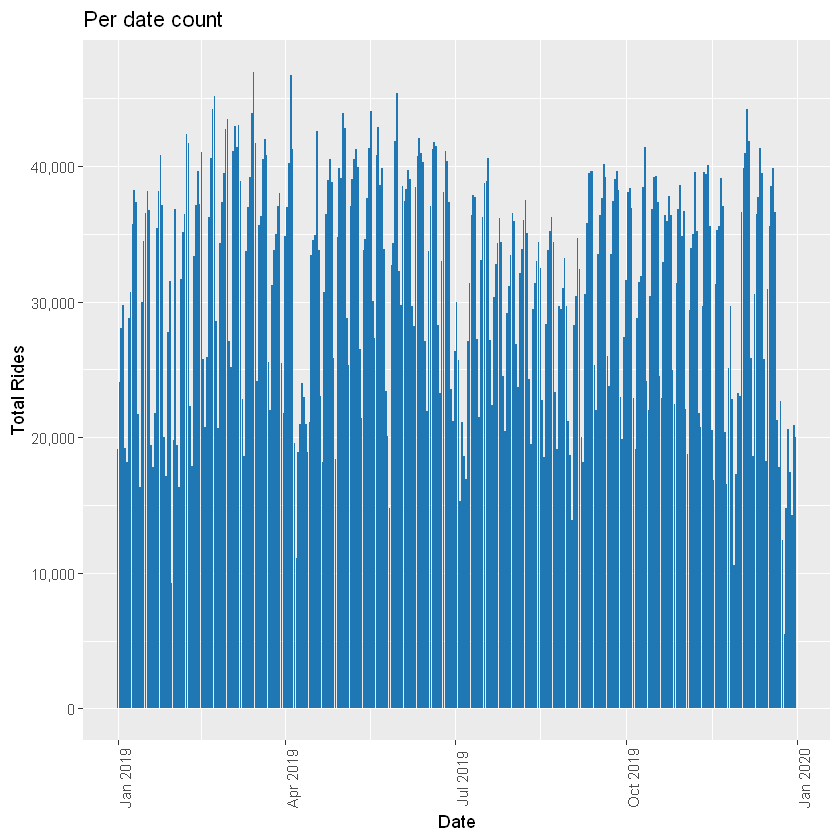

In [18]:
ggplot(daycount, aes(x=lubridateDateOnly, y=count))+geom_bar(stat="identity", fill="#1f78b4")+labs(y = "Total Rides", x="Date", title="Per date count")+scale_y_continuous(labels=comma)+theme(axis.text.x = element_text(angle = 90))

In [45]:
dfbar <- data.frame(
            date = daycount$lubridateDateOnly,
            rides = daycount$count
          )
    dfbar <- dfbar[order(dfbar$date),]
          datatable(dfbar,options  = list(lengthMenu = c(13,13)), rownames= FALSE)

HTML widgets cannot be represented in plain text (need html)

In [46]:
dfbar

date,rides
2019-01-01,19110
2019-01-02,24055
2019-01-03,28028
2019-01-04,29721
2019-01-05,19212
2019-01-06,18148
2019-01-07,28792
2019-01-08,30730
2019-01-09,35747
2019-01-10,38262


In [19]:
hourcount <- allData3 %>% group_by(hour) %>%summarise(count = n())

In [20]:
hourcount

hour,count
0,247076
1,192008
2,147402
3,112595
4,87146
5,91697
6,159737
7,340740
8,533624
9,572724


In [21]:
hourcount$hour <- factor(hourcount$hour, labels = c("12AM","1AM","2AM","3AM","4AM","5AM","6AM","7AM","8AM","9AM","10AM","11AM","12PM","1PM","2PM","3PM","4PM","5PM","6PM","7PM","8PM","9PM","10PM","11PM"))

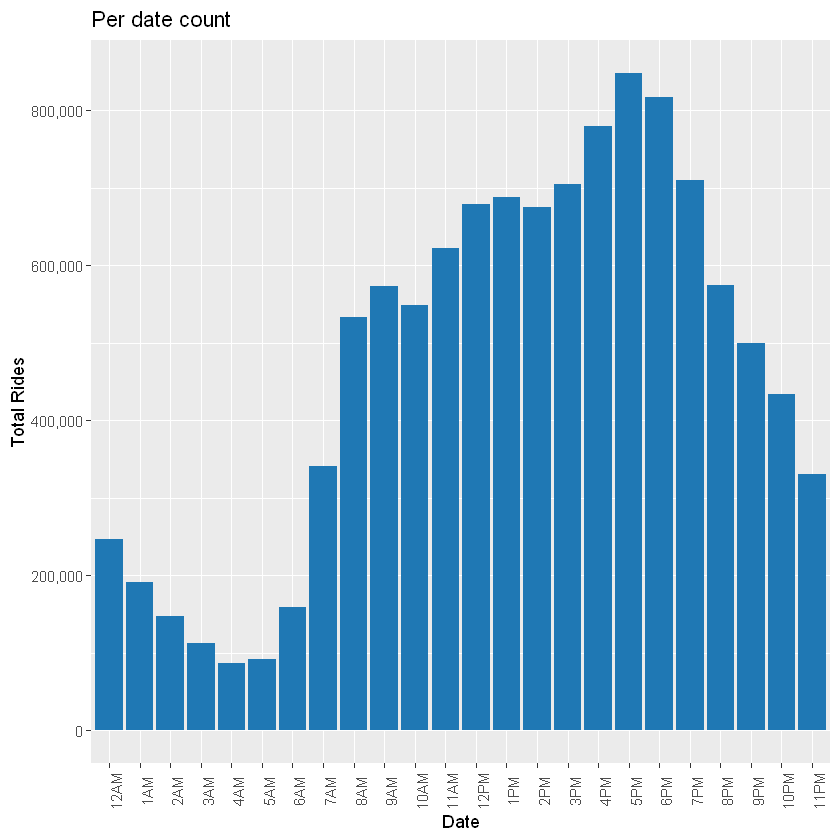

In [22]:
ggplot(hourcount, aes(x=hour, y=count))+geom_bar(stat="identity", fill="#1f78b4")+labs(y = "Total Rides", x="Date", title="Per date count")+scale_y_continuous(labels=comma)+theme(axis.text.x = element_text(angle = 90))

In [23]:
weekdaycount <- allData3 %>% group_by(weekday) %>%summarise(count = n())
weekdaycount

weekday,count
Friday,1915833
Monday,1583114
Saturday,1261132
Sunday,1059737
Thursday,1939243
Tuesday,1802296
Wednesday,1836651


In [24]:
weekdaycount$weekday <- factor(weekdaycount$weekday, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"), labels = c("Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"))

In [25]:
weekdaycount

weekday,count
Fri,1915833
Mon,1583114
Sat,1261132
Sun,1059737
Thurs,1939243
Tues,1802296
Wed,1836651


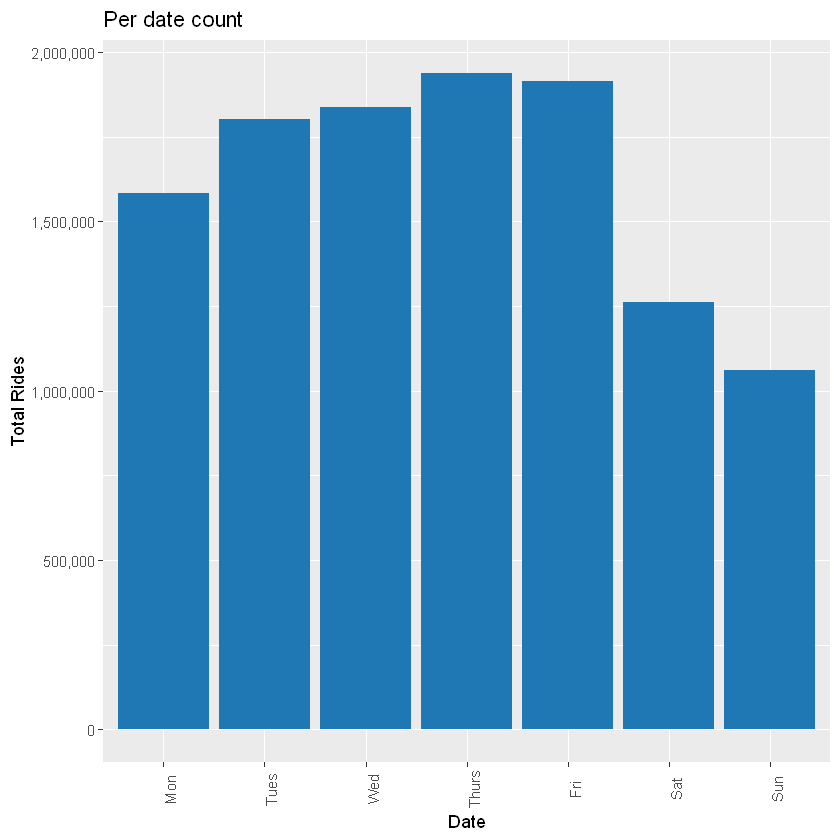

In [26]:
ggplot(weekdaycount, aes(x=weekday, y=count))+geom_bar(stat="identity", fill="#1f78b4")+labs(y = "Total Rides", x="Date", title="Per date count")+scale_y_continuous(labels=comma)+theme(axis.text.x = element_text(angle = 90))

In [27]:
monthcount <- allData3 %>% group_by(month) %>%summarise(count = n())
monthcount

month,count
1,859172
2,930006
3,1076162
4,903082
5,1083048
6,1045823
7,916993
8,927929
9,923601
10,1003907


In [28]:
monthcount$month <- factor(monthcount$month, levels = c(1,2,3,4,5,6,7,8,9,10,11,12), labels = c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct", "Nov", "Dec"))

In [29]:
monthcount

month,count
Jan,859172
Feb,930006
Mar,1076162
Apr,903082
May,1083048
Jun,1045823
Jul,916993
Aug,927929
Sep,923601
Oct,1003907


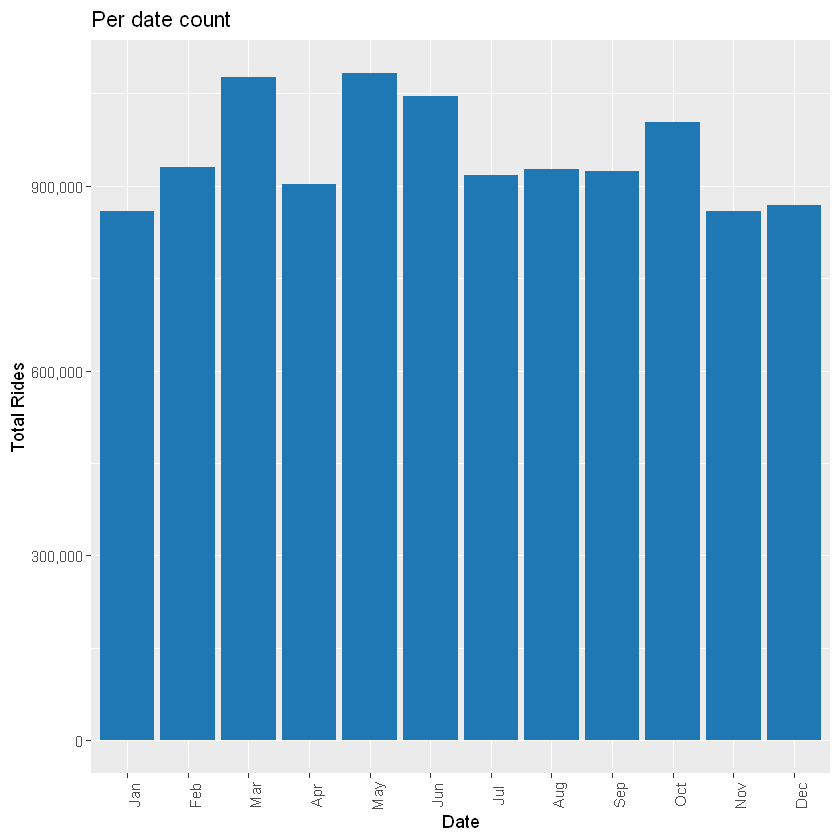

In [30]:
ggplot(monthcount, aes(x=month, y=count))+geom_bar(stat="identity", fill="#1f78b4")+labs(y = "Total Rides", x="Date", title="Per date count")+scale_y_continuous(labels=comma)+theme(axis.text.x = element_text(angle = 90))

In [31]:
mileagecount <- allData3 %>% group_by(Trip.Miles) %>%summarise(count = n())
mileagecount

Trip.Miles,count
0.50,241542
0.51,18699
0.52,19680
0.53,19593
0.54,20861
0.55,21126
0.56,21703
0.57,21707
0.58,22255
0.59,22021


In [32]:
sapply(mileagecount, class)


Trip.Miles      count 
 "numeric"  "integer"

In [33]:
mileagecount <- mileagecount %>% mutate(mileage_bin = cut(Trip.Miles, breaks=c(0.49, 1, 2,3,4,5,10,15,20,25,50,75,100)))

In [34]:
mileagecount

Trip.Miles,count,mileage_bin
0.50,241542,"(0.49,1]"
0.51,18699,"(0.49,1]"
0.52,19680,"(0.49,1]"
0.53,19593,"(0.49,1]"
0.54,20861,"(0.49,1]"
0.55,21126,"(0.49,1]"
0.56,21703,"(0.49,1]"
0.57,21707,"(0.49,1]"
0.58,22255,"(0.49,1]"
0.59,22021,"(0.49,1]"


In [35]:
mileagebincount <- mileagecount %>% group_by(mileage_bin) %>% summarise(Frequency = sum(count))
mileagebincount

mileage_bin,Frequency
"(0.49,1]",3085701
"(1,2]",3539481
"(2,3]",1182941
"(3,4]",629551
"(4,5]",379202
"(5,10]",827490
"(10,15]",598420
"(15,20]",1036266
"(20,25]",83429
"(25,50]",34819


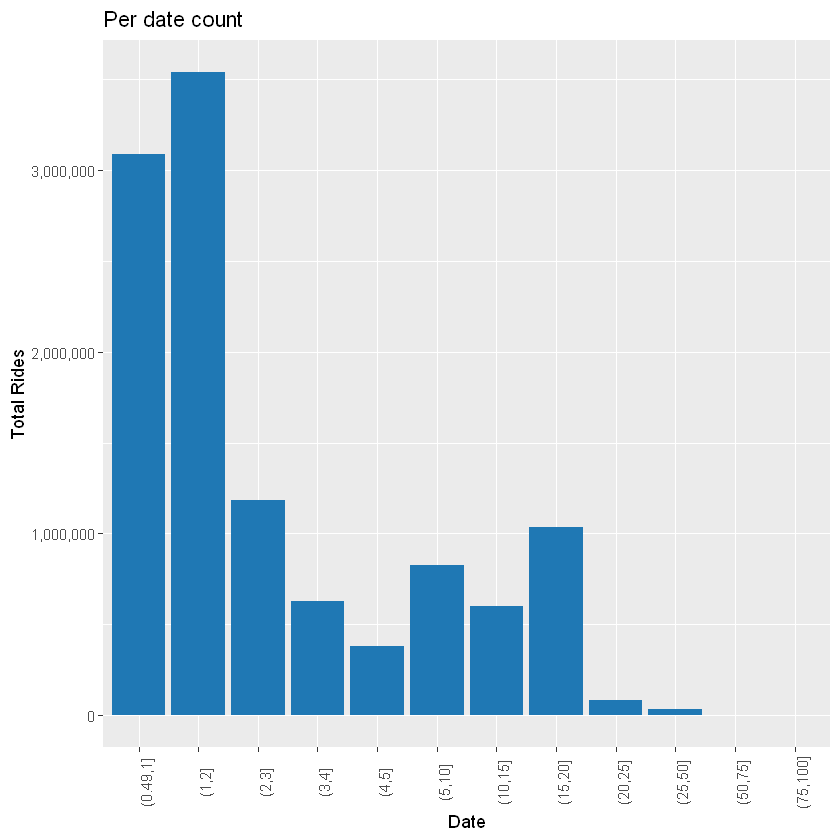

In [36]:
ggplot(mileagebincount, aes(x= mileage_bin, y=Frequency))+geom_bar(stat="identity", fill="#1f78b4")+labs(y = "Total Rides", x="Date", title="Per date count")+scale_y_continuous(labels=comma)+theme(axis.text.x = element_text(angle = 90))

In [37]:
triptimecount <- allData3 %>% group_by(Trip.Seconds) %>%summarise(count = n())
#triptimecount$Trip.Seconds <- as.numeric(as.character(triptimecount$Trip.Seconds))
triptimecount

Trip.Seconds,count
60,4056
61,22
62,23
63,27
64,20
65,28
66,21
67,28
68,43
69,32


In [38]:
sapply(triptimecount, class)


Trip.Seconds        count 
   "integer"    "integer"

In [39]:
# triptimecount <- subset(triptimecount, Trip.Seconds < 2500)
# triptimecount

In [40]:
triptimecount1 <- triptimecount %>% mutate(trip_time_bin = cut(Trip.Seconds, breaks=c(59,120,180,240,300,360,420,480,540,600,660,720,800,860,920,980,1020,1080,1140,1200,1260,1320,1380,1440,1500,1560,1620,1680,1740,1800,1860,1920,1980,2040,2100,2250,2500,2750,3000,3250,3500,3750,4000,5000,7500,10000,18000)))

In [41]:
triptimecount1bin <- triptimecount1 %>% group_by(trip_time_bin) %>% summarise(Frequency = sum(count))
triptimecount1bin

trip_time_bin,Frequency
"(59,120]",49234
"(120,180]",203222
"(180,240]",473822
"(240,300]",716818
"(300,360]",848144
"(360,420]",880838
"(420,480]",847223
"(480,540]",778063
"(540,600]",693935
"(600,660]",606339


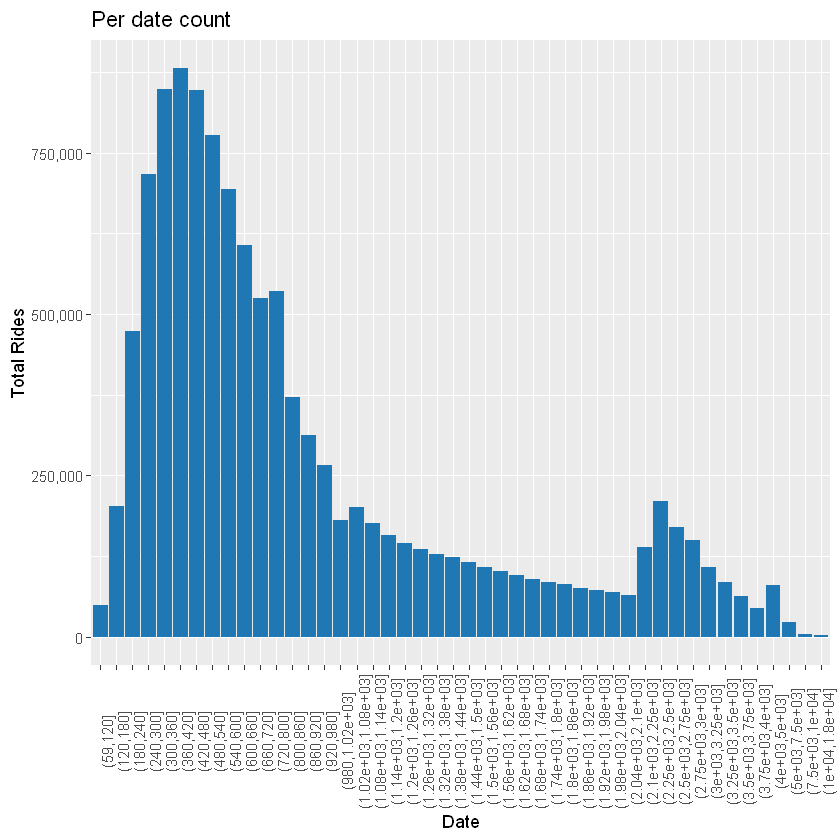

In [44]:
ggplot(triptimecount1bin, aes(x= trip_time_bin, y=Frequency))+geom_bar(stat="identity", fill="#1f78b4")+labs(y = "Total Rides", x="Date", title="Per date count")+scale_y_continuous(labels=comma)+theme(axis.text.x = element_text(angle = 90))

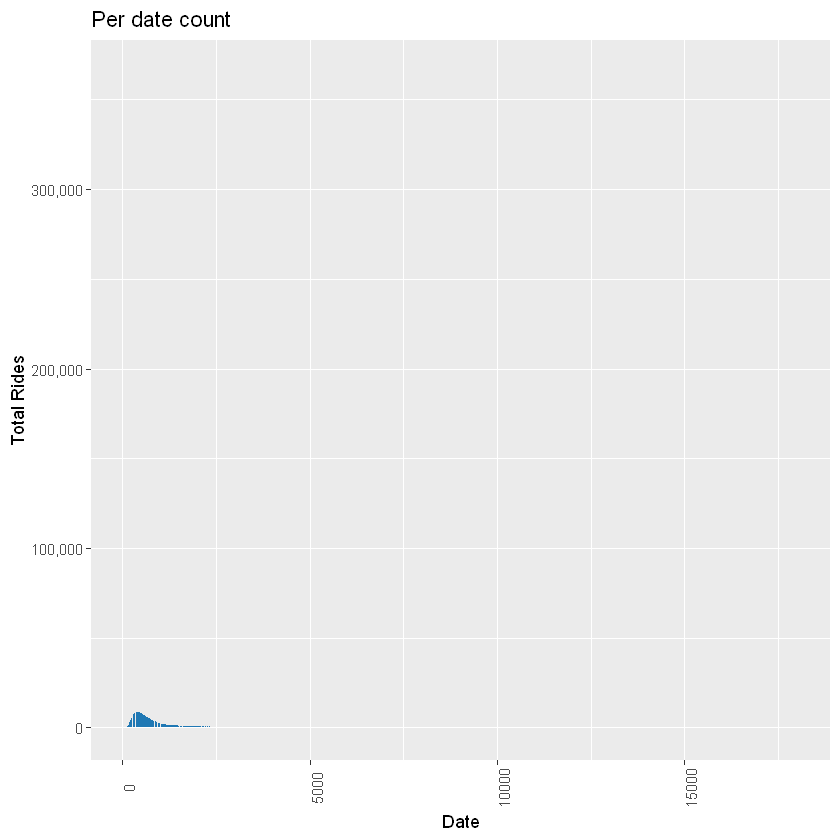

In [43]:
ggplot(triptimecount, aes(x= Trip.Seconds, y=count))+geom_bar(stat="identity", fill="#1f78b4")+labs(y = "Total Rides", x="Date", title="Per date count")+scale_y_continuous(labels=comma)+theme(axis.text.x = element_text(angle = 90))

In [49]:
      dfbar1 <- data.frame(
        hours = hourcount$hour,
        rides = hourcount$count
      )
      dfbar1 <- dfbar1[order(dfbar1$hours),]
      datatable(dfbar1,options  = list(lengthMenu = c(13,13)), rownames= FALSE)
    
dfbar1

HTML widgets cannot be represented in plain text (need html)

hours,rides
12AM,247076
1AM,192008
2AM,147402
3AM,112595
4AM,87146
5AM,91697
6AM,159737
7AM,340740
8AM,533624
9AM,572724


In [50]:
dfbar2 <- data.frame(
        weekdays = weekdaycount$weekday,
        rides = weekdaycount$count
      )
      dfbar2 <- dfbar2[order(dfbar2$weekdays),]
      datatable(dfbar2,options  = list(lengthMenu = c(13,13)), rownames= FALSE)
dfbar2

HTML widgets cannot be represented in plain text (need html)

,weekdays,rides
2,Mon,1583114
6,Tues,1802296
7,Wed,1836651
5,Thurs,1939243
1,Fri,1915833
3,Sat,1261132
4,Sun,1059737


In [51]:
dfbar3 <- data.frame(
        months = monthcount$month,
        rides = monthcount$count
      )
      dfbar3 <- dfbar3[order(dfbar3$months),]
      datatable(dfbar3,options  = list(lengthMenu = c(13,13)), rownames= FALSE)
dfbar3

HTML widgets cannot be represented in plain text (need html)

months,rides
Jan,859172
Feb,930006
Mar,1076162
Apr,903082
May,1083048
Jun,1045823
Jul,916993
Aug,927929
Sep,923601
Oct,1003907


In [52]:
    dfbar4 <- data.frame(
            miles = mileagebincount$mileage_bin,
            rides = mileagebincount$Frequency
          )
    dfbar4 <- dfbar4[order(dfbar4$miles),]
          datatable(dfbar4,options  = list(lengthMenu = c(13,13)), rownames= FALSE)

dfbar4

HTML widgets cannot be represented in plain text (need html)

miles,rides
"(0.49,1]",3085701
"(1,2]",3539481
"(2,3]",1182941
"(3,4]",629551
"(4,5]",379202
"(5,10]",827490
"(10,15]",598420
"(15,20]",1036266
"(20,25]",83429
"(25,50]",34819


In [54]:
     dfbar5 <- data.frame(
        time = triptimecount1bin$trip_time_bin,
        rides = triptimecount1bin$Frequency
      )
      dfbar5 <- dfbar5[order(dfbar5$time),]
      datatable(dfbar5,options  = list(lengthMenu = c(13,13)), rownames= FALSE)
dfbar5

HTML widgets cannot be represented in plain text (need html)

time,rides
"(59,120]",49234
"(120,180]",203222
"(180,240]",473822
"(240,300]",716818
"(300,360]",848144
"(360,420]",880838
"(420,480]",847223
"(480,540]",778063
"(540,600]",693935
"(600,660]",606339
